## Weather data analysis


In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import glob
from windrose import WindroseAxes
from math import pi

import sys
#stdout = sys.stdout
#reload(sys)
#sys.setdefaultencoding('utf-8')
#sys.stdout = stdout


/home/adam/Desktop/GITHUB_ADD/Weather_statistsics/windrose/windrose.py:29: MatplotlibDeprecationWarning: 
The Appender class was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  addendum = docstring.Appender(msg, "\n\n")
/home/adam/Desktop/GITHUB_ADD/Weather_statistsics/windrose/windrose.py:30: MatplotlibDeprecationWarning: 
The copy_dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use docstring.copy() and cbook.dedent() instead.
  return lambda func: addendum(docstring.copy_dedent(base)(func))
/home/adam/Desktop/GITHUB_ADD/Weather_statistsics/windrose/windrose.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.getdoc() instead.
  return lambda func: addendum(docstring.copy_dedent(base)(func))
/home/adam/Desktop/GITHUB_ADD/Weather_statistsics/windrose/windrose.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed 

In [2]:
# Reading all the CSV files
# Saving them in one pandas dataframe

path = r'Data'  
all_files = glob.glob(os.path.join(path, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent
df_from_each_file = (pd.read_csv(f, header = 10, sep= ';') for f in all_files)
df = pd.concat(df_from_each_file, ignore_index=True)  



In [3]:
df.head()

,Year,Month,Day,Hour,Minute,Temperature [2 m above gnd],Relative Humidity [2 m above gnd],Mean Sea Level Pressure [MSL],Total Precipitation (high resolution) [sfc],Total Precipitation (low resolution) [sfc],...,Low Cloud Cover [low cld lay],Sunshine Duration [sfc],Shortwave Radiation [sfc],Wind Speed [10 m above gnd],Wind Direction [10 m above gnd],Wind Speed [80 m above gnd],Wind Direction [80 m above gnd],Wind Speed [900 mb],Wind Direction [900 mb],Wind Gust [sfc]
0,2019,12,16,0,0,7.06,62.0,1011.6,0.0,0.0,...,0.0,-999.0,0.0,6.92,207.90,10.97,228.99,47.15,222.21,16.56
1,2019,12,16,1,0,6.70,65.0,1011.1,0.0,0.0,...,0.0,0.0,0.0,6.88,222.88,11.12,240.95,46.33,225.00,16.56
2,2019,12,16,2,0,6.25,70.0,1011.5,0.0,0.0,...,0.0,0.0,0.0,6.41,231.84,12.30,249.44,38.81,220.49,21.96
3,2019,12,16,3,0,5.81,70.0,1012.0,0.0,0.0,...,0.0,0.0,0.0,5.32,208.30,8.89,238.24,29.48,208.44,15.12
4,2019,12,16,4,0,5.61,69.0,1010.8,0.0,0.0,...,0.0,0.0,0.0,5.60,225.00,8.21,254.74,20.06,201.04,11.16


In [4]:
df.describe()

,Year,Month,Day,Hour,Minute,Temperature [2 m above gnd],Relative Humidity [2 m above gnd],Mean Sea Level Pressure [MSL],Total Precipitation (high resolution) [sfc],Total Precipitation (low resolution) [sfc],...,Low Cloud Cover [low cld lay],Sunshine Duration [sfc],Shortwave Radiation [sfc],Wind Speed [10 m above gnd],Wind Direction [10 m above gnd],Wind Speed [80 m above gnd],Wind Direction [80 m above gnd],Wind Speed [900 mb],Wind Direction [900 mb],Wind Gust [sfc]
count,168.0,168.0,168.000000,168.000000,168.0,168.000000,168.000000,168.000000,168.000000,168.000000,...,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,2019.0,12.0,19.000000,11.500000,0.0,8.451905,74.922619,1005.126190,0.208929,0.395833,...,35.011905,1.801845,57.473869,10.071012,194.798571,13.568750,191.484405,36.249048,205.450357,22.527857
std,0.0,0.0,2.005979,6.942881,0.0,2.006531,8.002991,8.736065,0.690815,0.904437,...,44.825542,79.839475,100.257205,8.361304,97.816249,10.924133,96.177458,16.918933,28.522962,13.618339
min,2019.0,12.0,16.000000,0.000000,0.0,4.040000,50.000000,988.300000,0.000000,0.000000,...,0.000000,-999.000000,0.000000,0.360000,4.090000,1.080000,4.090000,3.220000,87.400000,0.720000
25%,2019.0,12.0,17.000000,5.750000,0.0,6.730000,69.000000,998.100000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.390000,164.020000,5.227500,98.355000,24.620000,189.965000,10.980000
50%,2019.0,12.0,19.000000,11.500000,0.0,8.380000,76.000000,1006.150000,0.000000,0.000000,...,0.000000,0.000000,0.000000,7.450000,215.335000,10.500000,219.885000,37.690000,206.570000,22.140000
75%,2019.0,12.0,21.000000,17.250000,0.0,10.055000,81.000000,1011.600000,0.000000,0.200000,...,100.000000,0.000000,66.527500,13.137500,257.437500,18.555000,252.695000,47.060000,221.117500,31.680000
max,2019.0,12.0,22.000000,23.000000,0.0,12.730000,91.000000,1018.800000,5.200000,4.500000,...,100.000000,60.000000,337.310000,39.790000,360.000000,50.690000,360.000000,75.000000,283.050000,56.520000


## List of variables

In [5]:
df["Date"] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour']])

units = ['°C', '%' ,'hPa' ,'mm' , 'mm' ,'cm' , 'cm' , '%' ,'%' ,'%', '%', 'min', 'W/m2','km/h' , '°' ,'km/h', '°', 'km/h', '°', 'km/h'] #hard coded from the CSV
print("List of columns and their respective units: \n")

# List of columns
for i, column_name in enumerate(df.columns.values[0:25]):
    if i > 4 :
        print("{} \t {}".format(units[i-5], column_name))

List of columns and their respective units: 

°C 	 Temperature  [2 m above gnd]
% 	 Relative Humidity  [2 m above gnd]
hPa 	 Mean Sea Level Pressure  [MSL]
mm 	 Total Precipitation (high resolution)  [sfc]
mm 	 Total Precipitation (low resolution)  [sfc]
cm 	 Snowfall Amount (high resolution)  [sfc]
cm 	 Snowfall Amount (low resolution)  [sfc]
% 	 Total Cloud Cover  [sfc]
% 	 High Cloud Cover  [high cld lay]
% 	 Medium Cloud Cover  [mid cld lay]
% 	 Low Cloud Cover  [low cld lay]
min 	 Sunshine Duration  [sfc]
W/m2 	 Shortwave Radiation  [sfc]
km/h 	 Wind Speed  [10 m above gnd]
° 	 Wind Direction  [10 m above gnd]
km/h 	 Wind Speed  [80 m above gnd]
° 	 Wind Direction  [80 m above gnd]
km/h 	 Wind Speed  [900 mb]
° 	 Wind Direction  [900 mb]
km/h 	 Wind Gust  [sfc]


## Temperature and Relative humidity [2 m above gnd]

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


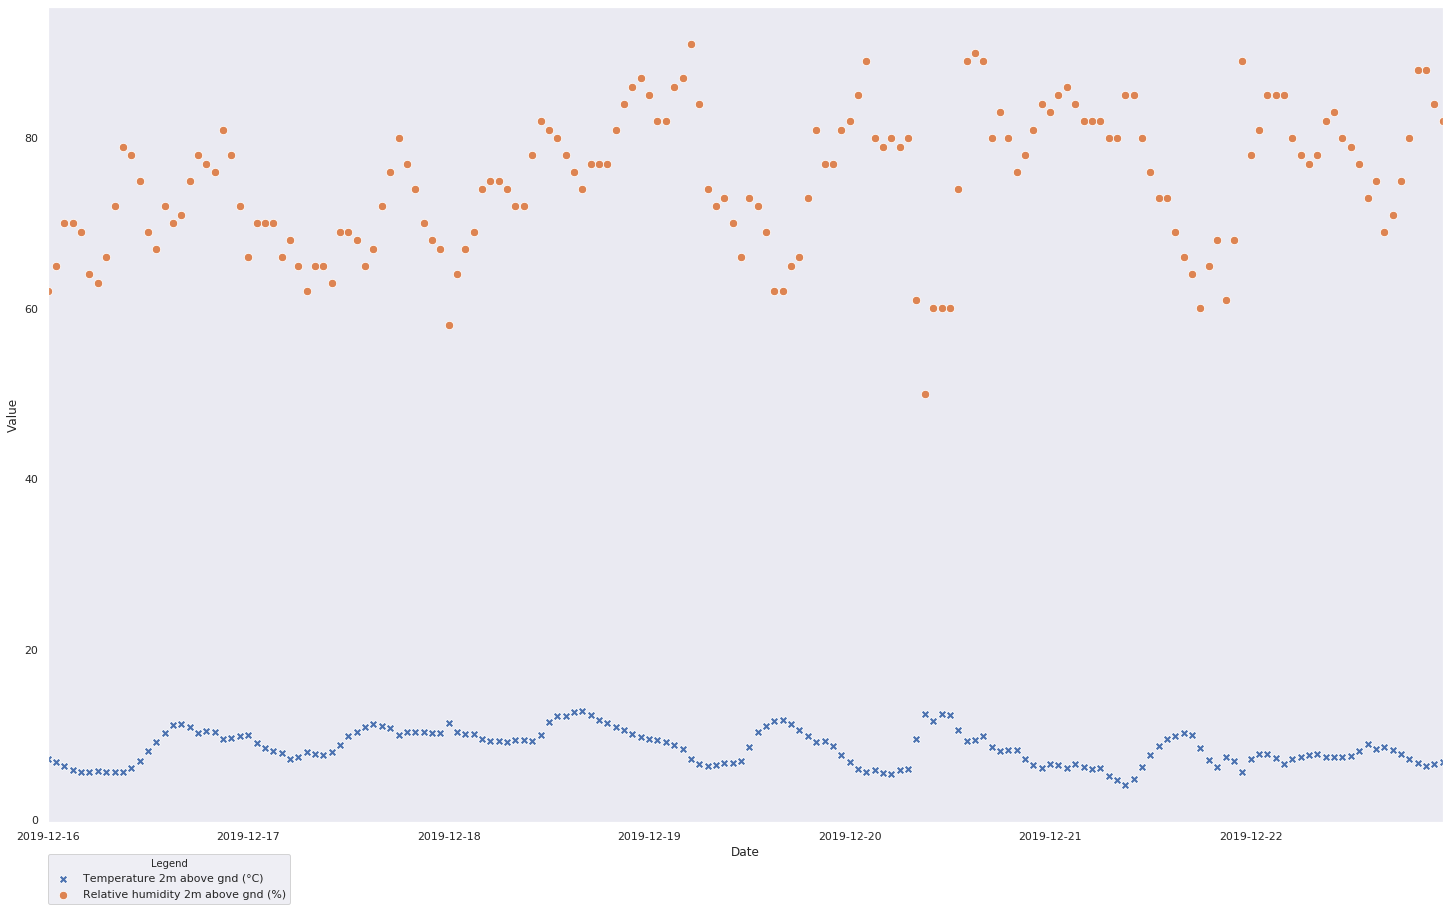

In [6]:
fig = plt.figure(figsize=(25, 15))
ax1 = fig.add_subplot(111)
ax1.grid()
ax1 = sns.scatterplot("Date", "Temperature  [2 m above gnd]", data=df, marker='X', s=70, label='Temperature 2m above gnd (°C)')
ax1 = sns.scatterplot("Date", "Relative Humidity  [2 m above gnd]", data=df, marker='o', s=70, label='Relative humidity 2m above gnd (%)')
ax1.set_xlim(df["Date"][0], df["Date"].iloc[-1])
ax1.set_xlabel('Date')
ax1.set_ylabel('Value')
ax1.legend(title="Legend", loc=(0, -0.1))


## Mean Sea Level Pressure

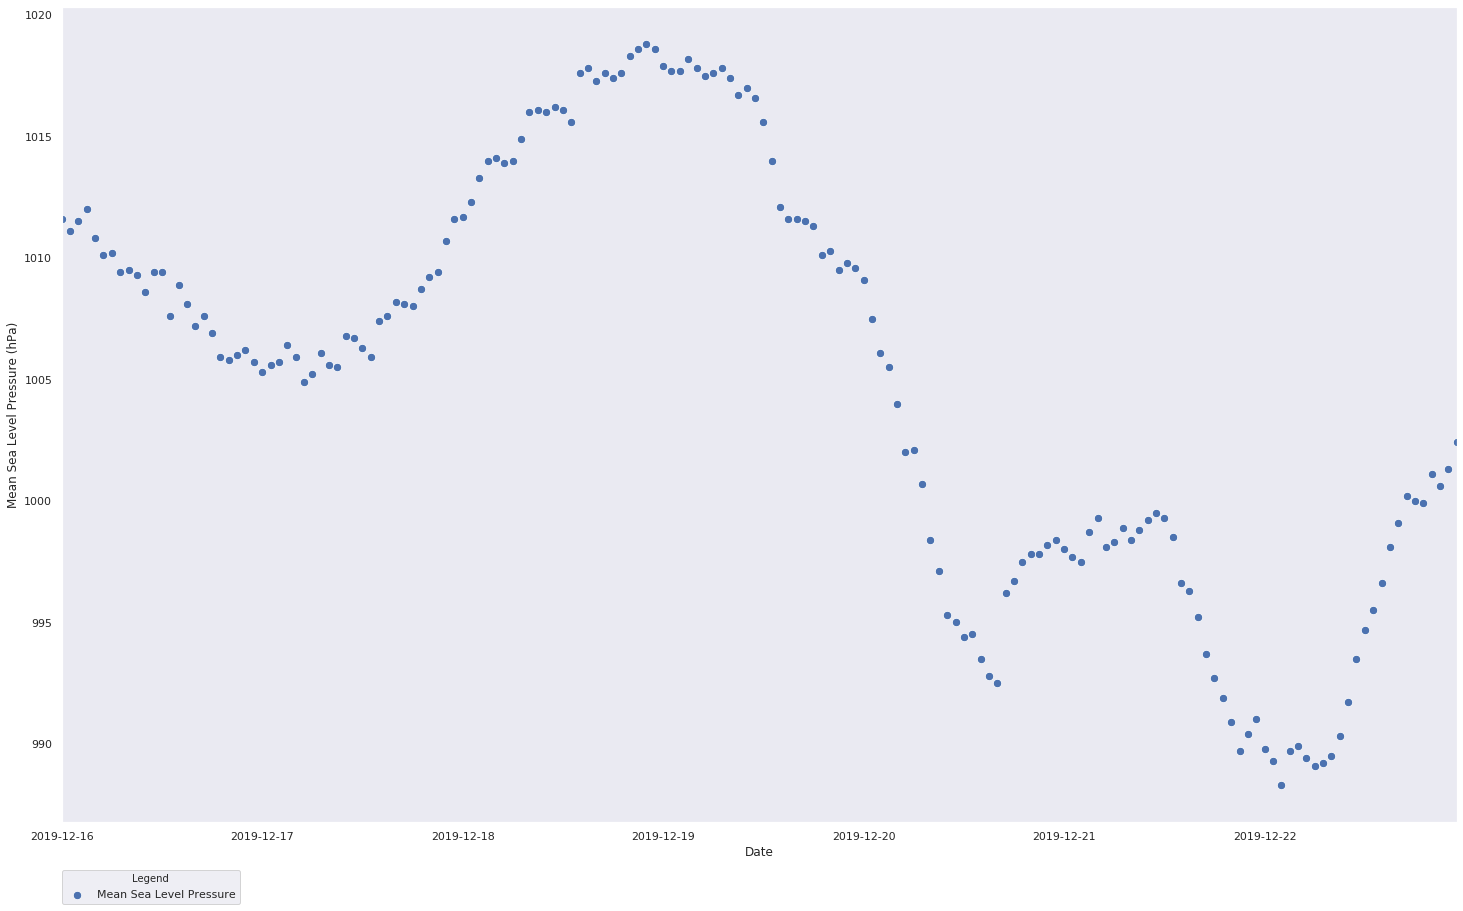

In [7]:
fig = plt.figure(figsize=(25, 15))
ax_pressure = fig.add_subplot(111)
plt.grid()

ax_pressure = sns.scatterplot("Date", "Mean Sea Level Pressure  [MSL]", data=df, marker='o', s=70, label='Mean Sea Level Pressure')
ax_pressure.set_xlim(df["Date"][0], df["Date"].iloc[-1])
ax_pressure.set_xlabel('Date')
ax_pressure.set_ylabel('Mean Sea Level Pressure (hPa)')
ax_pressure.legend(title="Legend", loc=(0, -0.1))

## Shortwave Radiation (or Global Horizontal Irradiance)

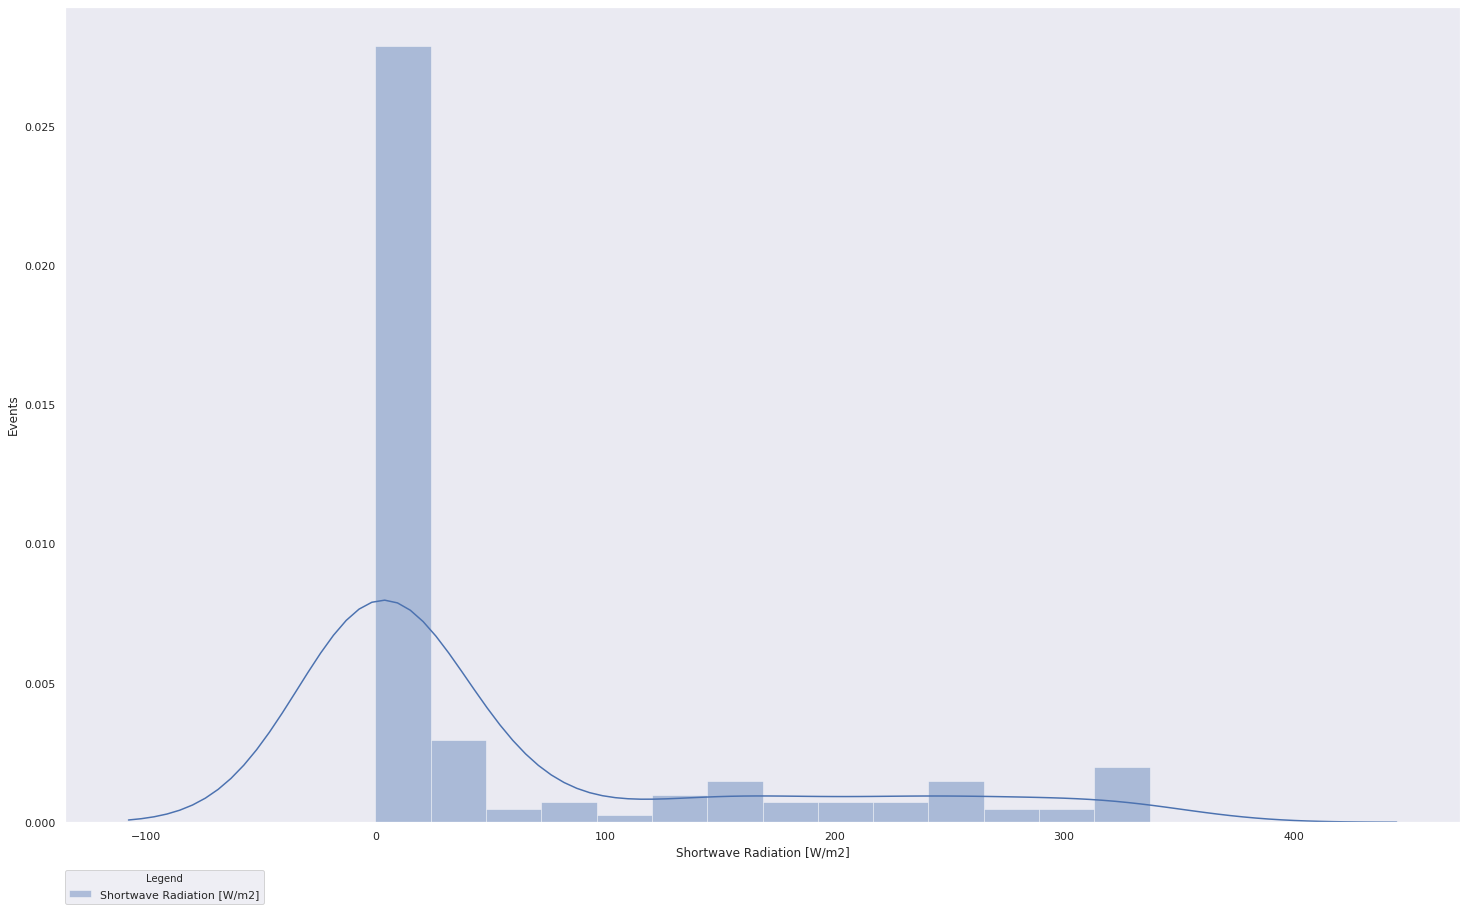

In [8]:
fig = plt.figure(figsize=(25, 15))
ax_radiation = fig.add_subplot(111)
ax_radiation.grid()

ax_radiation = sns.distplot(df["Shortwave Radiation  [sfc]"], label='Shortwave Radiation [W/m2]')
ax_radiation.set_xlabel('Shortwave Radiation [W/m2]')
ax_radiation.set_ylabel('Events')
ax_radiation.legend(title="Legend", loc=(0, -0.1))

## Sunshine duration

(0, 70)

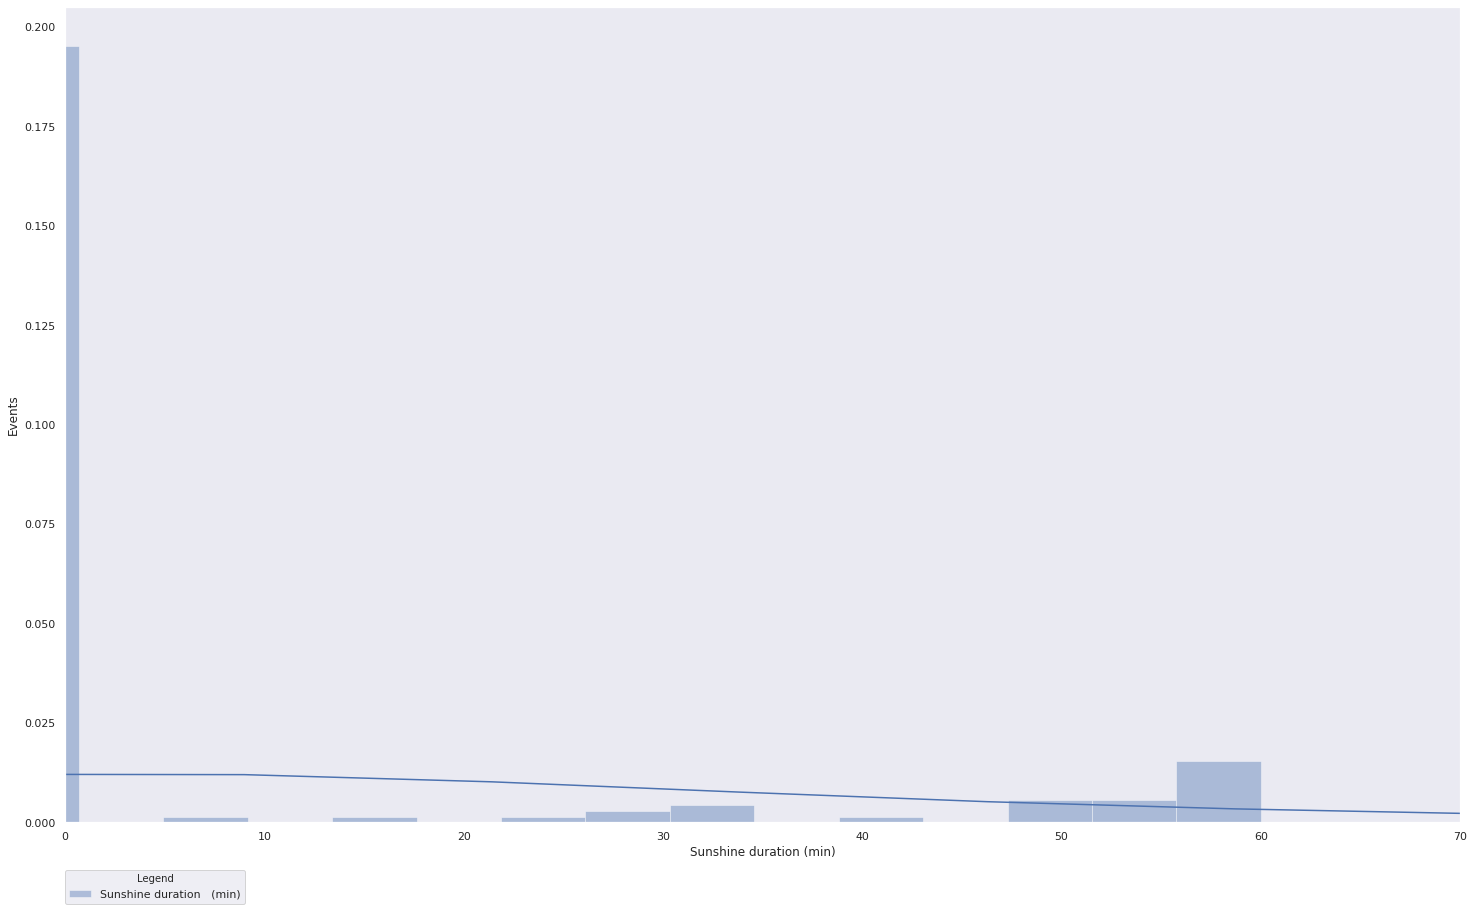

In [9]:
fig = plt.figure(figsize=(25, 15))
ax_sunshine_duration = fig.add_subplot(111)
ax_sunshine_duration.grid()

ax_sunshine_duration = sns.distplot(df["Sunshine Duration  [sfc]"], bins=250, label='Sunshine duration   (min)')
ax_sunshine_duration.set_xlabel('Sunshine duration (min)')
ax_sunshine_duration.set_ylabel('Events')
ax_sunshine_duration.legend(title="Legend", loc=(0, -0.1))
ax_sunshine_duration.set_xlim(0, 70)


## Wind speed

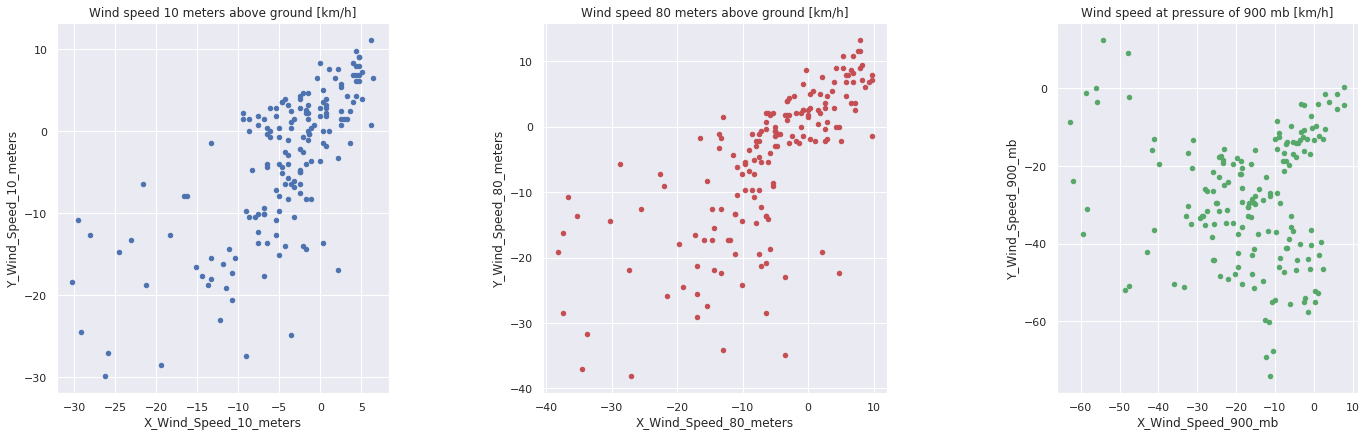

In [10]:
fig = plt.figure(figsize=(25, 15))

df['X_Wind_Speed_10_meters'] = df['Wind Speed  [10 m above gnd]'] * np.sin(df['Wind Direction  [10 m above gnd]'] * pi / 180.0)
df['Y_Wind_Speed_10_meters'] = df['Wind Speed  [10 m above gnd]'] * np.cos(df['Wind Direction  [10 m above gnd]'] * pi / 180.0)
df['X_Wind_Speed_80_meters'] = df['Wind Speed  [80 m above gnd]'] * np.sin(df['Wind Direction  [80 m above gnd]'] * pi / 180.0)
df['Y_Wind_Speed_80_meters'] = df['Wind Speed  [80 m above gnd]'] * np.cos(df['Wind Direction  [80 m above gnd]'] * pi / 180.0)
df['X_Wind_Speed_900_mb'] = df['Wind Speed  [900 mb]'] * np.sin(df['Wind Direction  [900 mb]'] * pi / 180.0)
df['Y_Wind_Speed_900_mb'] = df['Wind Speed  [900 mb]'] * np.cos(df['Wind Direction  [900 mb]'] * pi / 180.0)

ax3 = fig.add_subplot(2, 3, 1)
ax4 = fig.add_subplot(2, 3, 2)
ax5 = fig.add_subplot(2, 3, 3)


ax3.set_aspect('equal')
ax3.set_title('Wind speed 10 meters above ground [km/h]')
ax3 = df.plot(kind='scatter', x='X_Wind_Speed_10_meters', y='Y_Wind_Speed_10_meters', ax=ax3, color='b')


ax4.set_aspect('equal')
ax4.set_title('Wind speed 80 meters above ground [km/h]')
ax4 = df.plot(kind='scatter', x='X_Wind_Speed_80_meters', y='Y_Wind_Speed_80_meters', ax=ax4, color='r')

ax5.set_aspect('equal')
ax5.set_title('Wind speed at pressure of 900 mb [km/h]')
ax5 = df.plot(kind='scatter', x='X_Wind_Speed_900_mb', y='Y_Wind_Speed_900_mb', ax=ax5, color='g')



## Wind plots

<Figure size 1800x1080 with 0 Axes>

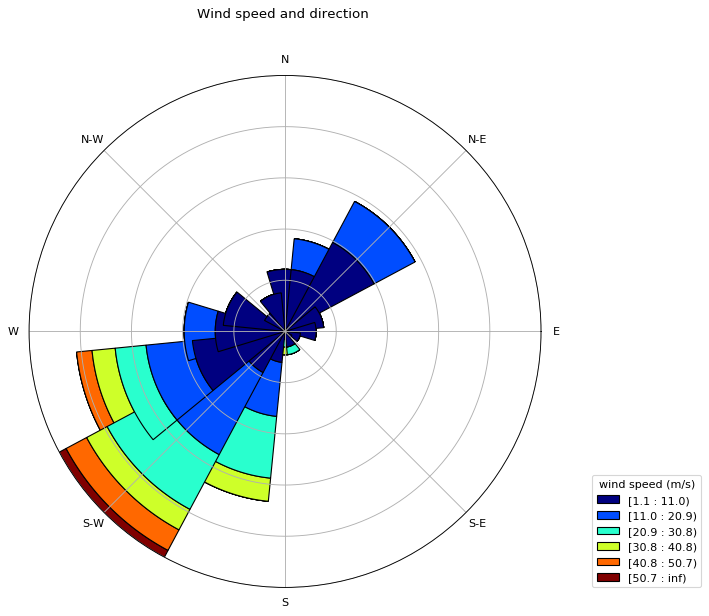

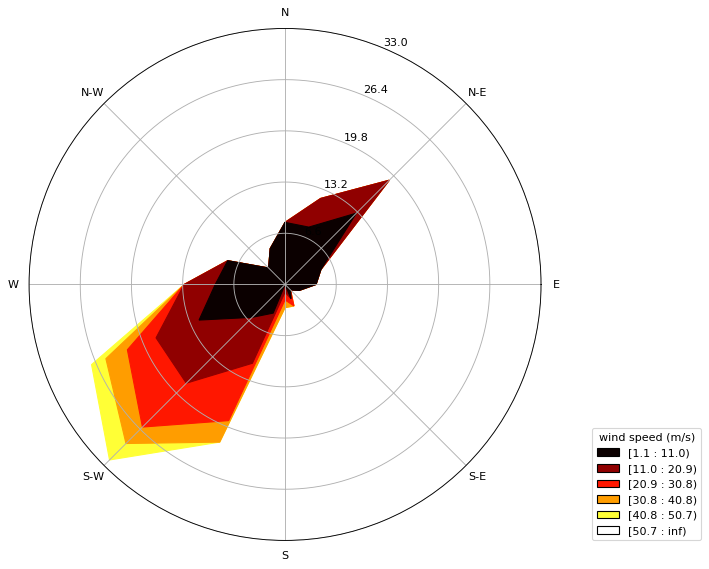

In [11]:
fig = plt.figure(figsize=(25, 15))


plt.style.use('default') #To switch to seaborn use plt.style.use('seaborn') 


ax6 = WindroseAxes.from_ax()
ax6.bar(df['Wind Direction  [80 m above gnd]'], df['Wind Speed  [80 m above gnd]'], normed=True, opening=1.5, edgecolor='black')
ax6.set_title("Wind speed and direction ", position=(0.5, 1.1))
ax6.set_yticklabels([])
ax6.set_legend()
ax6.legend(title="wind speed (m/s)", loc=(1.1, 0))

ax7 = WindroseAxes.from_ax()
ax7.contourf(df['Wind Direction  [80 m above gnd]'], df['Wind Speed  [80 m above gnd]'], cmap=cm.hot)
ax7.legend(title="wind speed (m/s)", loc=(1.1, 0))





## Correlation between variables

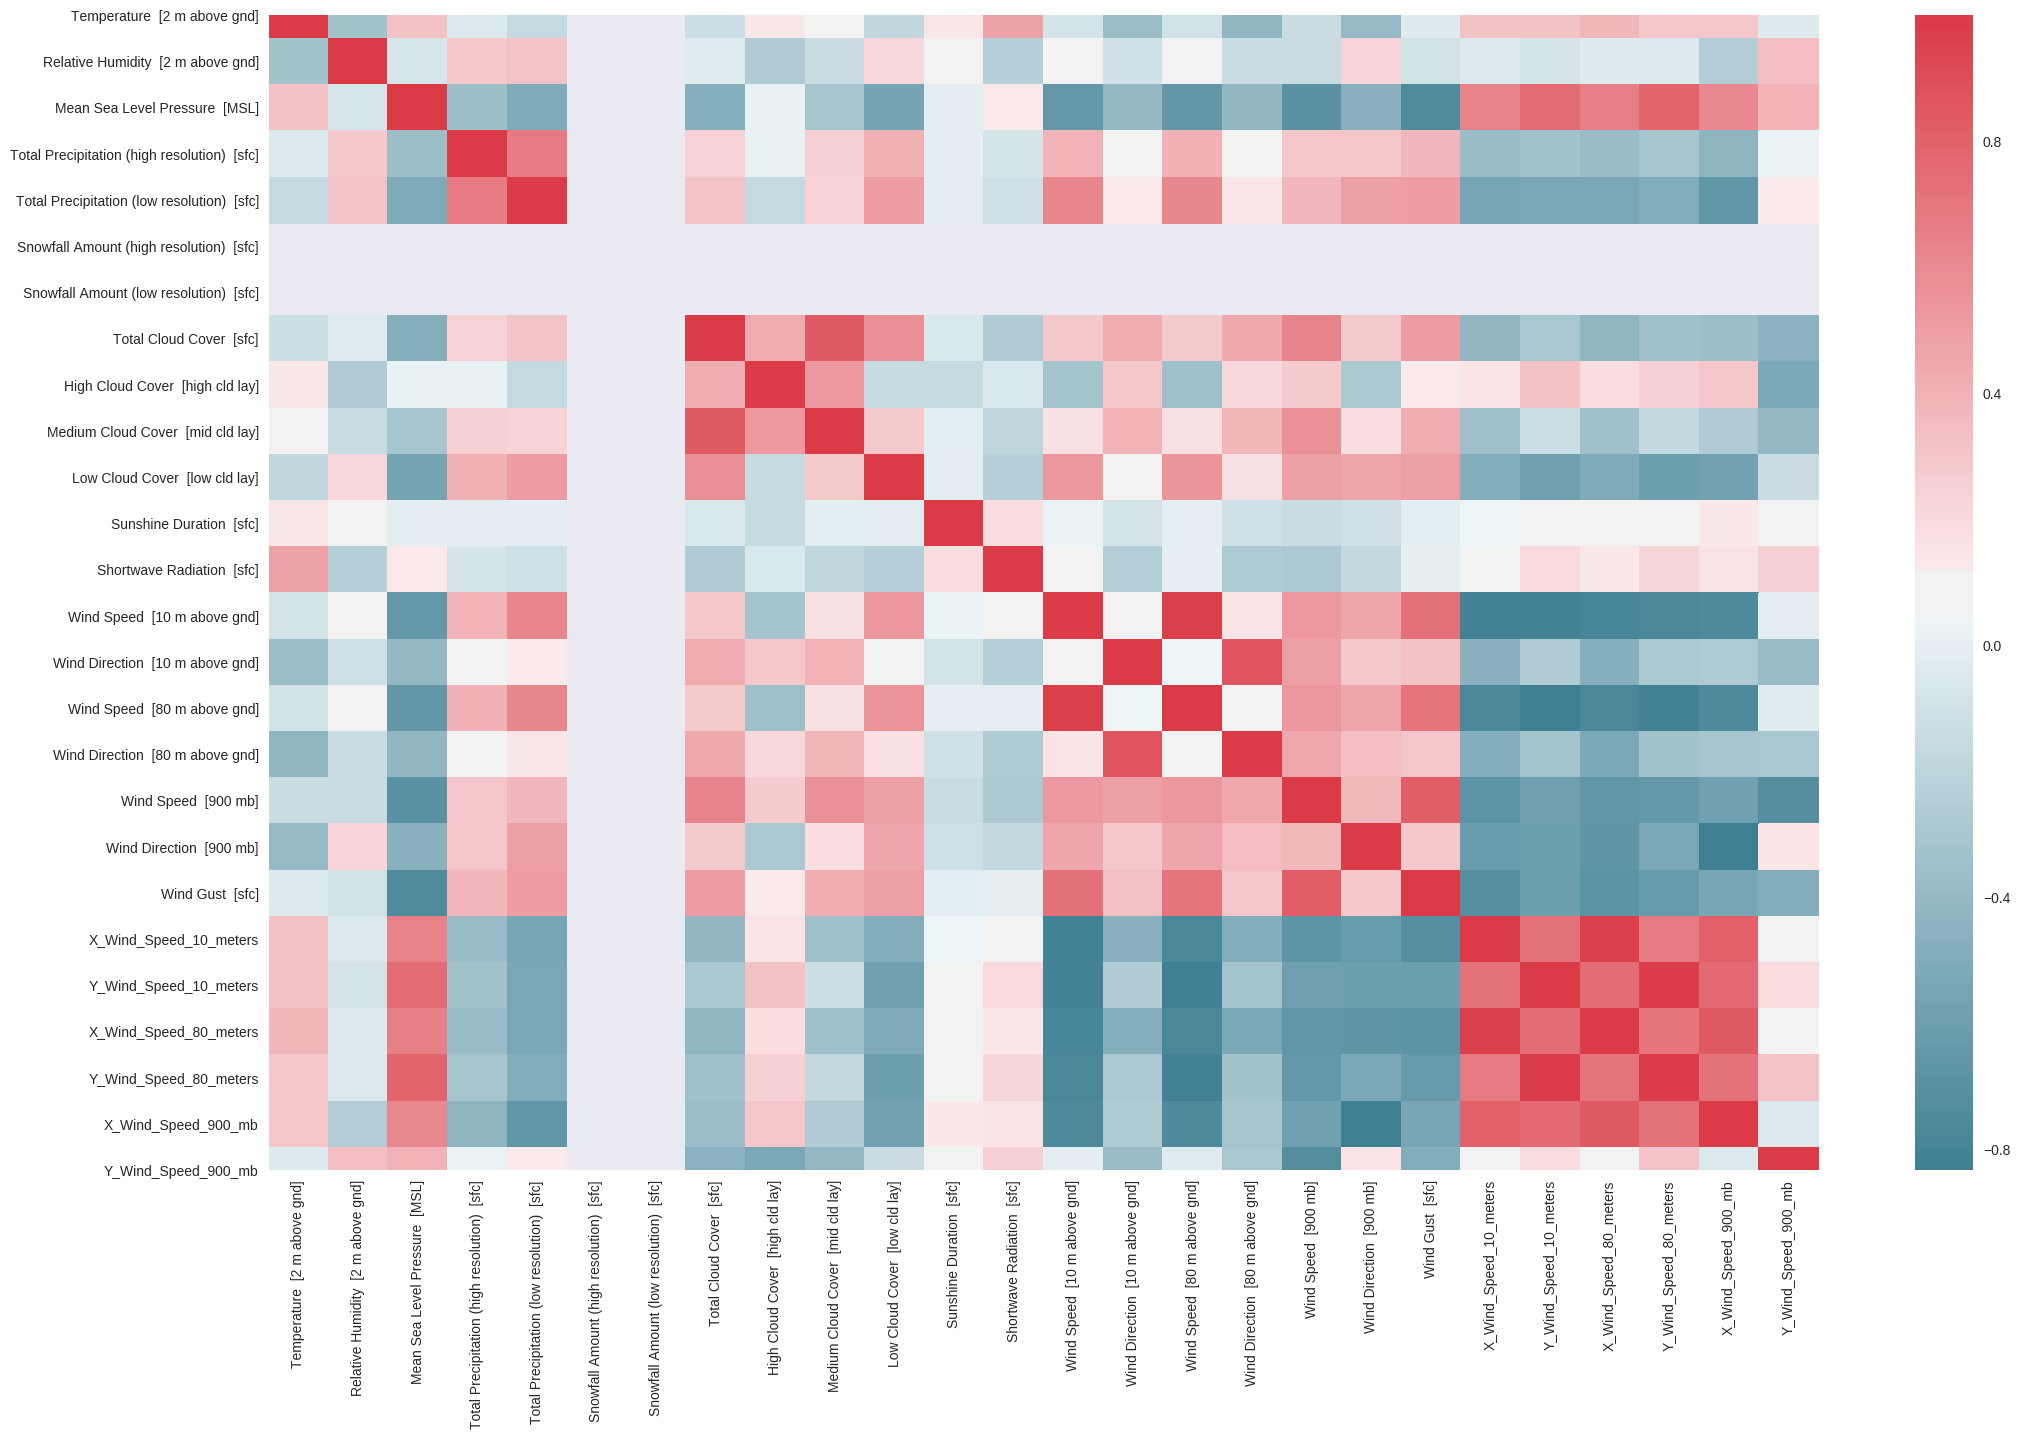

In [12]:
plt.style.use('seaborn') 
fig = plt.figure(figsize=(25, 15))
ax2 = fig.add_subplot(111)
corr = df.loc[:,df.dtypes == 'float64'].corr()
ax2 = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))
